# Исследование объявлений о продаже квартир

**Дано:** данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Задача:** научиться определять рыночную стоимость квартир, в частности установить параметры рыночной стоимости квартир.
Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

**План исследования:**
 1. Обзор данных.
 2. Предобработка данных (поиск и замена пропущенных значений, аномалий, дубликатов).
 3. Исследовательский анализ данных.
 4. Проверка гипотез.

## 1. Обзор данных

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
try:
    real_estate_data = pd.read_csv('/Users/galina//Desktop/учёба/real_estate_data.csv', sep='\t')
except:
    real_estate_data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
real_estate_data.info()  #смотрю общую инфо по таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
real_estate_data.head(10)  #смотрю первые 10 строк

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [5]:
real_estate_data.isna().sum()  #смотрю, сколько и в каких столбцах пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
real_estate_data.describe([.5])  #смотрю описание таблицы

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Выводы:

1. Есть пропущенные значения в столбцах:
- `ceiling_height`,  
- `floors_total`,
- `living_area`,
- `is_apartment`,
- `kitchen_area`,
- `balcony`,
- `locality_name`,
- `airports_nearest`,      
- `cityCenters_nearest`,
- `parks_around3000`,      
- `parks_nearest`,         
- `ponds_around3000`,      
- `ponds_nearest`,         
- `days_exposition`.       

Пропуски могли возникнуть из-за человеческого фактора либо сбоев алгоритмов, встроенных в сайт объявлений. Например, не указано кол-во прудов, парков и расстояние до них, потому что дом в поселке, где нет прудов и/или парков. Что касается столбца `is_apartment`, то в нем данные, скорее всего, пропущены из-за того, что при заполнении не поставили 0.

2. Тип данных в части столбцов можно заменить более подходящим.
Например, в столбцах:
- `last_price`,
- `balcony`,
- `days_exposition`
<br>можно изменить `float` на `int`.

А в столбце `first_day_exposition` можно заменить строки ISO на даты, в столбце `is_apartment` - `object` на `bool`.

3. Есть артефакты, например, минимальное значение в `ceiling_height` - 1 м, а максимальное - 100 м. Или `living_area` - 2 кв.м., хотя это может быть доля квартиры.

4. Возможно, есть дубликаты, посмотрю в п.2.Предобработка данных.

5. Судя по данным в столбцах, где есть пропуски, в таблице больше всего данных по стандартным квартирам в 5- и 9-этажках со стандартной высотой потолка до 3 м, маленькой жилплощадью. На этом этапе мало что дает, кроме общего понимания, что данные соответствуют "портрету" средней квартиры в России. А это значит, что данные в большей части правдивые.

6. Стандартное отклонение на этом этапе мало что скажет, так как квартиры по параметрам и, следовательно, по стоимости разные.

**Данных достаточно для проверки гипотез, но встречаются пропуски и ошибки в данных, которые надо заменить и исправить.**

## 2. Предобработка данных

### 2.1. Замена значений 

#### 2.1.1. Cтолбец `ceiling_height`

В столбце `ceiling_height` есть пропуски, минимальное значение 1 м, а максимальное 100 м.

Для начала посмотрю, сколько строк, в которых значение столбца `ceiling_height` больше 5,5м (в СПб есть старый жилфонд + новостройки, где потолки 5,5м).

In [7]:
real_estate_data.query('ceiling_height > 5.5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.0,2,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
1388,20,59800000.0,399.0,2015-01-21T00:00:00,5,5.6,6.0,NaN,6,NaN,...,NaN,0.0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,NaN,...,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3474,3,1400000.0,30.0,2018-03-16T00:00:00,1,8.0,5.0,15.3,2,False,...,7.3,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.0,9.0,30.0,2,NaN,...,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5.0,19.5,1,True,...,5.5,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,NaN,...,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08T00:00:00,2,26.0,9.0,21.3,3,NaN,...,7.0,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,NaN,...,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0


Квартир с потолком больше 5,5м - 32 шт. В случае с высотой потолков 27, 26 метров можно допустить, что это ошибка при вводе - хотели поставить 2,7, а поставили 27. Но потолки 6м и больше уже странно.
Поэтому в квартирах с потолками до 32м заменю высоту потолков на высоту в 10 раз меньше, остальные (с потолками выше 6м) удалю, так как их ничтожно мало:

In [8]:
#заменяю высоту потолков "руками", так как данных под замену мало:
real_estate_data['ceiling_height'] = real_estate_data['ceiling_height'].replace(22.6, 2.26)  
real_estate_data['ceiling_height'] = real_estate_data['ceiling_height'].replace(25, 2.5)
real_estate_data['ceiling_height'] = real_estate_data['ceiling_height'].replace(26, 2.6)
real_estate_data['ceiling_height'] = real_estate_data['ceiling_height'].replace(27, 2.7)
real_estate_data['ceiling_height'] = real_estate_data['ceiling_height'].replace(27.5, 2.75)
real_estate_data['ceiling_height'] = real_estate_data['ceiling_height'].replace(32, 3.2)
#удаляю квартиры с потолком выше 6м:
real_estate_data = real_estate_data.drop(real_estate_data[real_estate_data['ceiling_height'] > 6].index)  

Теперь посмотрю на строки, в которых значение столбца `ceiling_height` меньше 2,3м
(минимум по действующим СНИП для квартир 2,5м, но иногда бывает "опущение" потолка из-за потолочных конструкций и поднятия пола).

In [9]:
real_estate_data.query('ceiling_height < 2.3')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
552,11,2999000.0,33.50,2017-03-30T00:00:00,1,2.00,15.0,17.500000,6,NaN,...,6.50,NaN,Санкт-Петербург,33972.0,11746.0,1.0,520.0,1.0,949.0,270.0
2572,4,2400000.0,62.00,2018-12-27T00:00:00,3,2.00,5.0,40.000000,4,NaN,...,6.00,1.0,Луга,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4212,1,2120000.0,35.43,2017-12-18T00:00:00,1,2.00,18.0,16.600000,9,NaN,...,8.80,2.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,36.0
5712,5,1500000.0,42.80,2017-08-14T00:00:00,2,1.20,2.0,27.500000,1,NaN,...,5.20,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
5850,9,1650000.0,35.50,2018-05-29T00:00:00,1,2.00,5.0,NaN,5,NaN,...,NaN,NaN,Луга,NaN,NaN,NaN,NaN,NaN,NaN,100.0
11352,4,3300000.0,36.00,2017-06-18T00:00:00,1,2.00,17.0,15.200000,12,NaN,...,10.10,0.0,посёлок Металлострой,25268.0,26980.0,0.0,NaN,0.0,NaN,53.0
12755,2,1400000.0,22.50,2017-09-21T00:00:00,1,2.20,2.0,18.000000,2,NaN,...,4.50,1.0,село Копорье,NaN,NaN,NaN,NaN,NaN,NaN,45.0
16446,6,12300000.0,88.30,2019-03-12T00:00:00,3,2.00,5.0,63.900000,2,NaN,...,12.00,NaN,Санкт-Петербург,38415.0,7675.0,1.0,568.0,1.0,154.0,NaN
16884,0,1500000.0,33.00,2018-10-03T00:00:00,1,2.00,5.0,20.000000,5,False,...,6.00,NaN,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,6.0
16934,5,4100000.0,40.00,2017-10-17T00:00:00,1,1.75,37.0,17.400000,5,NaN,...,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0


Квартир с потолком ниже 2,3м - 17 шт. Скорее всего, это ошибка при вводе данных, поэтому такие квартиры либо можно удалить, так как их мало (17 от 23699 - это сотые процента), либо заменить в них высоту потолка на медианное значение.
Я удалю:

In [10]:
real_estate_data = real_estate_data.drop(real_estate_data[real_estate_data['ceiling_height'] < 2.3].index)  #удалила квартиры с потолком ниже 2,3м

Заменю пустые значение в `ceiling_height` на медианные по столбцу:

In [11]:
ceiling_height_median = real_estate_data['ceiling_height'].median()

In [12]:
real_estate_data['ceiling_height'] = real_estate_data['ceiling_height'].fillna(ceiling_height_median)

#### 2.1.2. Cтолбец `floors_total`

Теперь посмотрим строки, в которых в столбце `floors_total` пропуски:

In [13]:
real_estate_data[real_estate_data['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,2.65,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.65,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,2.65,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,2.65,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,2.65,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.80,NaN,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,2.65,NaN,31.70,20,NaN,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,2.65,NaN,45.38,6,NaN,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,2.65,NaN,50.40,18,NaN,...,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


В 86 строках не указано общее кол-во этажей. Причина - скорее всего, человеческий фактор.
<br>Поскольку этажность дома, в котором находится квартира, влияет на цену квартиры, то можно поискать точные данные по этажности дома по совпадению адреса, если бы адреса были указаны. 
<br>Можно все строки с пропущенными значениями удалить:

    real_estate_data.dropna(subset=['floors_total'], inplace=True),
<br>так как на основе текущих данных даже близкими к истинным значениями заменить пропущенные значения нельзя, кроме того, 86 строк - это 0,36%.
<br>Но я их оставляю, так как указан этаж конкретной квартиры, и эти данные потребуются дальше в исследовательком анализе.

#### 2.1.3. Cтолбцы `living_area`,  `kitchen_area`, `studio`

В `kitchen_area` 2229, `living_area` 1870 пропусков. Возможная причина пропусков - человеческий фактор, когда продавец, указав, общую площадь, считает, что этого достаточно.
<br>Cначала посмотрю на студии (квартиры с кол-вом комнат 0), так как в студиях нет выделенного пространства под кухню, возможно, большинство пропусков в `kitchen_area` и `living_area` именно в строках со студиями:

В `studio` пропусков нет. Но! Студией считается квартира с нулевым кол-вом комнат. 
При этом в датафрейме студий в столбце `studio` - 149 (посчитала real_estate_data['studio'].value_counts()), а кол-во квартир с нулевым кол-вом комнат - 197, а строк, где `studio` == True и `rooms` == 0  - 138 шт. То есть явно где-то ошибка, но исправлять ее не вижу смысла, так как корректно не исправлю.
Это так, в качестве наблюдения.

Вернусь к `kitchen_area` и `living_area`.
<br>Cначала посмотрю на квартиры с кол-вом комнат 0, так как, возможно, это студии, где нет выделенного пространства под кухню, и возможно, большинство пропусков в `kitchen_area` и `living_area` именно в этих строках:

In [14]:
real_estate_data.query('rooms == 0')[['kitchen_area', 'living_area']].isnull().sum()

kitchen_area    197
living_area      14
dtype: int64

Аналогично посмотрю на студии, возможно, большинство пропусков в `kitchen_area` и `living_area` именно в этих студиях:

In [15]:
real_estate_data.query('studio == True')[['kitchen_area', 'living_area']].isnull().sum()

kitchen_area    149
living_area      10
dtype: int64

Нет, и на студии, и на квартиры с нулевым кол-вом комнат приходится совсем мало пропусков в `kitchen_area` и `living_area`.

Чтобы заполнить пропуски в `living_area` и `kitchen_area`, можно посчитать соотношение жилой площади и общей площади и соотношение площади кухни и общей площади:

    living_area_ratio = round(real_estate_data['living_area'].median() / 
    real_estate_data['total_area'].median(), 3) = 0.577 
    kitchen_area_ratio = round(real_estate_data['kitchen_area'].median() / 
    real_estate_data['total_area'].median(), 3) = 0.175
    
И с помощью этих 2 показателей заменить пропуски во всех объектах, где кол-во комнат не 0.

Но так заполнять пропуски некорректно, так как где-нибудь на Лисьем носу может быть дом на 1500кв.м., из которых жилая площадь - менее 0,5, так как остальное занимают кухня, веранда, лестницы, коридоры, то есть нежилая площадь.

<br>Поэтому оставлю эти пропуски без заполнения и удалять не буду, так как их много - 9,4% по столбцу `kitchen_area`, 7,9% - `living_area`.

#### 2.1.4. Cтолбец `is_apartment`

В столбце `is_apartment` - 20924 пропуска. Предполагаю, что пропуски возникли из-за того, что продавцы не знают разницу между квартирой и апартаментами, так как понятие апартаменты было введено недавно, правового статуса у апартаментов нет, они идут как "нежилые помещения".
<br>Посмотрю на значения, в которых `is_apartment` непустые:

In [16]:
real_estate_data['is_apartment'].value_counts()

False    2722
True       48
Name: is_apartment, dtype: int64

Так как я выше уже писала, что понятие апартаменты было введено недавно, посмотрю, когда появилась первая непустая запись в `is_apartment`:

In [17]:
real_estate_data.query('is_apartment == False or is_apartment == True')[['is_apartment', 'first_day_exposition']].sort_values('first_day_exposition', ascending = True).head()

,is_apartment,first_day_exposition
8393,False,2014-11-27T00:00:00
3486,False,2014-11-27T00:00:00
15427,False,2014-11-27T00:00:00
16159,False,2014-11-27T00:00:00
11492,True,2014-12-09T00:00:00


Первая непустая запись в `is_apartment` появилась 27 ноября 2014 года. 
<br>При этом первая пустая запись в `is_apartment` появилась тоже 27 ноября 2014 года:

In [18]:
real_estate_data[(real_estate_data['is_apartment'].isna() == True)][['is_apartment', 'first_day_exposition']].sort_values('first_day_exposition', ascending = True).head()

,is_apartment,first_day_exposition
20635,NaN,2014-11-27T00:00:00
2831,NaN,2014-11-27T00:00:00
4812,NaN,2014-11-27T00:00:00
3291,NaN,2014-11-27T00:00:00
6726,NaN,2014-11-27T00:00:00


То есть заполнять пропуски значением False нельзя, т.к. если это сделать, то у меня будет всего 50 апартаментов, что вряд ли правда с учетом роста объема продаж апартаментов с 2014 года.
Поэтому оставлю эти строки без изменений.

#### 2.1.5. Cтолбец `balcony` 

В столбце `balcony` 11519 пропусков. Возможно, человек не указал число балконов, потому что их нет. Поэтому заменю такие пропуски на 0:

In [19]:
real_estate_data['balcony'] = real_estate_data['balcony'].fillna(0)

#### 2.1.6. Cтолбец `locality_name` 

В `locality_name` 49 пропусков. Возможная причина возникновения пропуска - человеческий фактор, когда продавец думает, что если заполняет объявление в разделе "СПб", то эти данные либо "подтянутся" сами, либо будет очевидно, что объект в СПб.
<br>По данным администрации города, протяжённость СПб в административных границах: с севера на юг в пределах КАД — 32 км, следовательно, примерный радиус СПб - 16 км. То есть в тех квартирах, где указано расстояние от центра 16 км, вместо пропуска в `locality_name` можно указать СПб.

In [20]:
real_estate_data[(real_estate_data['locality_name'].isna())][['locality_name', 'cityCenters_nearest']]

,locality_name,cityCenters_nearest
1097,NaN,4258.0
2033,NaN,NaN
2603,NaN,17369.0
2632,NaN,17369.0
3574,NaN,8127.0
4151,NaN,3902.0
4189,NaN,3039.0
4670,NaN,5382.0
5343,NaN,9538.0
5707,NaN,16788.0


Есть строки/объекты недвижимости, где не указан город, но есть информация по расстоянию от центра.
<br>Заменяю пропуски на "Санкт-Петербург" по тем строкам, где `cityCenters_nearest` <= 16 км:

In [21]:
real_estate_data.loc[(real_estate_data['locality_name'].isna()) \
                     & (real_estate_data['cityCenters_nearest'] <= 16000),
                     'locality_name'] = real_estate_data.loc[(real_estate_data['locality_name'].isnull()) \
                                                             & (real_estate_data['cityCenters_nearest'] <= 16000),
                                                             'locality_name'].fillna('Санкт-Петербург')
real_estate_data['locality_name'].isnull().sum() #проверяю, сколько осталось пропусков после замены

21

Оставшиеся после замены 21 пропуск в `locality_name` оставлю без изменений. Их можно было бы заполнить по адресу, если б адрес был указан.

#### 2.1.7. Cтолбец `airports_nearest` 

Расстояние до ближайшего аэропорта не указано в 5531 строках. Но поскольку этот параметр в исследовании не участвует, просто оставлю, как есть, удалять не стану, так как таких строк - 23,36%.

#### 2.1.8. Cтолбец `cityCenters_nearest` 

Расстояние до центра города пропущено в 5519 строках. Возможно, из-за того, что данные рассчитывал алгоритм, встроенный в сайт объявлений, произошел сбой работы этого алгоритма - и появились пропуски. 
Посмотрю, сколько пропущено значений расстояния до центра для квартир из Санкт-Петербурга, так как эти данные  понадобятся для анализа.

In [22]:
len(real_estate_data[(real_estate_data['locality_name'] == 'Санкт-Петербург') \
                     & (real_estate_data['cityCenters_nearest'].isna())])

61

In [23]:
len(real_estate_data[(real_estate_data['locality_name'] == 'Санкт-Петербург') \
                     & (real_estate_data['cityCenters_nearest'].isna())]) / \
len(real_estate_data.query('locality_name == "Санкт-Петербург"'))

0.0038762152888098113

Расстояние до центра города для квартир из Санкт-Петербурга пропущено в 61 строке, это 0,4% от всех квартир в Санкт-Петербурге. Остальные пропуски - в городах и поселках Ленобласти, и тогда становится понятны пропуски в этом столбце - это уже человеческий фактор, что продавец не станет указывать расстояние до центра СПб, если продает квартиру в области, а скорее укажет расстояние до КАД.
<br>Поэтому оставляем строки без изменений.

#### 2.1.9. Cтолбцы `parks_around3000`, `parks_nearest`,  `ponds_around3000`,  `ponds_nearest`

В столбцах `parks_around3000`, `parks_nearest`,  `ponds_around3000`,  `parks_nearest`пропущены значения в 18181,  8079, 18181, 9110 строках соответственно. Подозреваю, что для продажи квартир эти параметры неважны, поэтому тут человеческий фактор - продавцы просто поленились их заполнить. Посмотрю ради любопытства, одни и те же ли это сроки:

In [24]:
real_estate_data[(real_estate_data['parks_around3000'].isna() == True) \
                 & (real_estate_data['ponds_around3000'].isna() == True)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5506 entries, 5 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          5506 non-null   int64  
 1   last_price            5506 non-null   float64
 2   total_area            5506 non-null   float64
 3   first_day_exposition  5506 non-null   object 
 4   rooms                 5506 non-null   int64  
 5   ceiling_height        5506 non-null   float64
 6   floors_total          5496 non-null   float64
 7   living_area           4885 non-null   float64
 8   floor                 5506 non-null   int64  
 9   is_apartment          625 non-null    object 
 10  studio                5506 non-null   bool   
 11  open_plan             5506 non-null   bool   
 12  kitchen_area          4793 non-null   float64
 13  balcony               5506 non-null   float64
 14  locality_name         5498 non-null   object 
 15  airports_nearest    

В строках, где отсутствуют данные в столбце `parks_around3000`, отсутствуют данные и по столбцам `ponds_around3000`, `parks_nearest` и `parks_nearest`. То есть подтредились подозрения, что продавцы игнорируют подряд эти 4 столбца при заполнении.
Оставляю эти столбцы, как есть - без заполнения и удаления, так как конкретные параметры в исследовании не участвуют, но кол-во строк большое.

#### 2.1.10. Cтолбец `days_exposition`

В `days_exposition` - 3181 пропуск, это 13% от общего кол-ва строк. Пропуски и слишком длинные сроки возможны из-за того, что объявление могли не закрыть и закрыть через несколько лет. Для замены пропусков можно посчитать медианное значение `days_exposition`, но, на мой взгляд, конечный срок продажи квартиры зависит не от статистики по рынку, а от конкретной квартиры и продавца. Поэтому можно либо оставить эти пропуски, либо заменить их на нуль. Я заменю на нуль: 

In [25]:
real_estate_data['days_exposition'] = real_estate_data['days_exposition'].fillna(0)

### 2.2. Замена типов данных

Заменяю тип данных на более подходящий в столбцах:
- `last_price` - с`float` на `int`, так как копейки при продаже квартиры никто не использует
- `balcony` - с`float` на `int`, так как нет дробного значения балконов
- `days_exposition` - с`float` на `int`, так как удобнее считать целыми днями, а не дробными
- `first_day_exposition` - с ISO на даты, так как удобнее.

In [26]:
real_estate_data['last_price'] = real_estate_data['last_price'].astype('int') 

real_estate_data['balcony'] = real_estate_data['balcony'].astype('int')

real_estate_data['days_exposition'] = real_estate_data['days_exposition'].astype('int')

real_estate_data['first_day_exposition'] = pd.to_datetime(real_estate_data['first_day_exposition'],
                                                          format='%Y-%m-%dT%H:%M:%S')

real_estate_data['is_apartment'] = real_estate_data['is_apartment'].astype('bool')

Проверяю, как изменился датафрейм:

In [27]:
real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23673 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23673 non-null  int64         
 1   last_price            23673 non-null  int64         
 2   total_area            23673 non-null  float64       
 3   first_day_exposition  23673 non-null  datetime64[ns]
 4   rooms                 23673 non-null  int64         
 5   ceiling_height        23673 non-null  float64       
 6   floors_total          23587 non-null  float64       
 7   living_area           21772 non-null  float64       
 8   floor                 23673 non-null  int64         
 9   is_apartment          23673 non-null  bool          
 10  studio                23673 non-null  bool          
 11  open_plan             23673 non-null  bool          
 12  kitchen_area          21399 non-null  float64       
 13  balcony         

In [28]:
real_estate_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,NaN,9,True,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121


### 2.3. Удаление дубликатов

In [29]:
real_estate_data.duplicated().sum()  #проверяю, есть ли явные дубликаты и сколько

0

Явных дубликатов нет, неявных я не нашла, поэтому можно идти дальше.

### Выводы:
1. В столбце `ceiling_height` были пропуски, которые я заменила на медиану по столбцу, и неверные значения, которые я удалила.  В столбце `balcony` заменила пропуски на 0. В `locality_name` частично заменила пропуски на населенный пункт. В `days_exposition` заменила пропуски на 0.
2. Однако я оставила без изменений часть столбцов (`floors_total`, `living_area`, `kitchen_area`, `is_apartment`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`), так как они либо не участвуют в дальнейших исследованиях, либо замена в них нелогична.
3. Тип данных в части столбцов заменила на более подходящий или удобный.

<br>В целом после предобработки данных осталось на 23 строки меньше, чем в начале, что хорошо, так как данных достаточно для работы и, главное, для валидных выводов.

## 3. Подсчеты и добавление данных

По условиям необходимо посчитать и добавить:
<br>1) цену квадратного метра
<br>2) день недели, месяц и год публикации объявления
<br>3) этаж квартиры; варианты — первый, последний, другой
<br>4) соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [30]:
#считаю и добавляю цену квадратного метра, перевожу в целочисленное:
real_estate_data['price_sqm'] = (real_estate_data['last_price'] / real_estate_data['total_area']).astype('int') 

In [31]:
#создаю столбцы дня недели, месяца и года публикации объявления
real_estate_data['weekday'] = real_estate_data['first_day_exposition'].dt.weekday
real_estate_data['month'] = real_estate_data['first_day_exposition'].dt.month
real_estate_data['year'] = real_estate_data['first_day_exposition'].dt.year

In [32]:
#создаю функцию категоризации по этажам
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
    
#категоризирую этажи с помощью функции  
real_estate_data['floor_category'] = real_estate_data.apply(floor_category, axis=1)

#но можно и так:
#import numpy as np
#real_estate_data['floor_category'] = np.where(real_estate_data['floor'] == 1, 'первый') и т.д.

In [33]:
#считаю и добавляю столбец соотношения жилой площади к общей
real_estate_data['living_area_ratio'] = real_estate_data['living_area'] / real_estate_data['total_area']

#считаю и добавляю столбец отношения площади кухни к общей
real_estate_data['kitchen_area_ratio'] = real_estate_data['kitchen_area'] / real_estate_data['total_area']

In [34]:
#смотрю, что получилось:
real_estate_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_sqm,weekday,month,year,floor_category,living_area_ratio,kitchen_area_ratio
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,2.0,755.0,0,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,...,0.0,NaN,81,82920,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,...,2.0,574.0,558,92785,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,NaN,9,True,...,3.0,234.0,424,408176,4,7,2015,другой,NaN,NaN
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,1.0,48.0,121,100000,1,6,2018,другой,0.320000,0.410000


## 4. Исследовательский анализ данных

Поскольку столбцы `total_images`, `studio`, `open_plan`, `parks_around3000`, `parks_nearest`, `ponds_around3000`,  `ponds_nearest`, `balcony`, `is_apartment`, `airports_nearest` никак не участвуют в дальнейшем анализе и загромождают таблицу, я создам новую таблицу без них для дальнейшей работы: 

In [35]:
#создаю новую таблицу
real_estate_data_onlyneeded = real_estate_data[['last_price', 'total_area', 'first_day_exposition',
                                                'rooms', 'ceiling_height','floors_total', 'living_area',
                                                'floor', 'kitchen_area', 'locality_name', 'cityCenters_nearest',
                                                'days_exposition', 'price_sqm','weekday', 'month', 'year',
                                                'floor_category', 'living_area_ratio','kitchen_area_ratio'
                                               ]]
#смотрю описание
real_estate_data_onlyneeded.describe()

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,cityCenters_nearest,days_exposition,price_sqm,weekday,month,year,living_area_ratio,kitchen_area_ratio
count,2.367300e+04,23673.000000,23673.000000,23673.000000,23587.000000,21772.000000,23673.000000,21399.000000,18166.000000,23673.000000,2.367300e+04,23673.000000,23673.000000,23673.000000,21772.000000,21399.000000
mean,6.543991e+06,60.362719,2.071009,2.697306,10.674185,34.465210,5.892494,10.572031,14191.160905,156.659401,9.942240e+04,2.569256,6.399442,2017.366958,0.564766,0.187350
std,1.089223e+07,35.666584,1.078603,0.220622,6.595968,22.036781,4.885774,5.907517,8609.968260,213.608686,5.021379e+04,1.789094,3.491861,1.039911,0.105340,0.072962
min,1.219000e+04,12.000000,0.000000,2.300000,1.000000,2.000000,1.000000,1.300000,181.000000,0.000000,1.110000e+02,0.000000,1.000000,2014.000000,0.021583,0.025381
25%,3.413000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,9238.000000,22.000000,7.664800e+04,1.000000,3.000000,2017.000000,0.495180,0.133333
50%,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,13100.000000,74.000000,9.500000e+04,3.000000,6.000000,2017.000000,0.567829,0.172414
75%,6.800000e+06,70.000000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,16293.000000,199.000000,1.142590e+05,4.000000,10.000000,2018.000000,0.637830,0.232424
max,7.630000e+08,900.000000,19.000000,6.000000,60.000000,409.700000,33.000000,112.000000,65968.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.000000,0.787879


### 4.1. Изучение площади, цены, числа комнат, высоты потолков. Гистограммы для каждого параметра

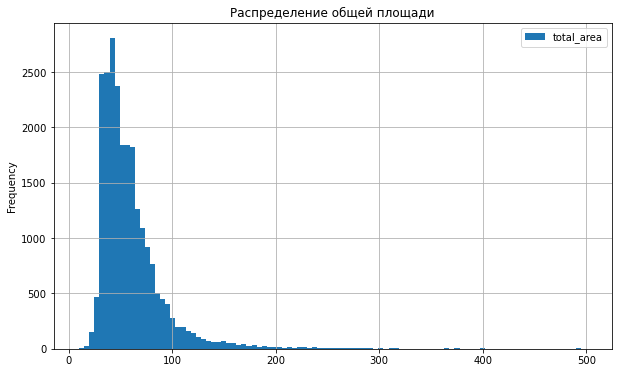

In [36]:
#строю гистограмму для 'total_area'
real_estate_data_onlyneeded.plot(y='total_area',
                                 kind='hist',
                                 bins=100,
                                 grid=True,
                                 figsize=(10,6),
                                 range=(10,500))
plt.title('Распределение общей площади')
plt.show()

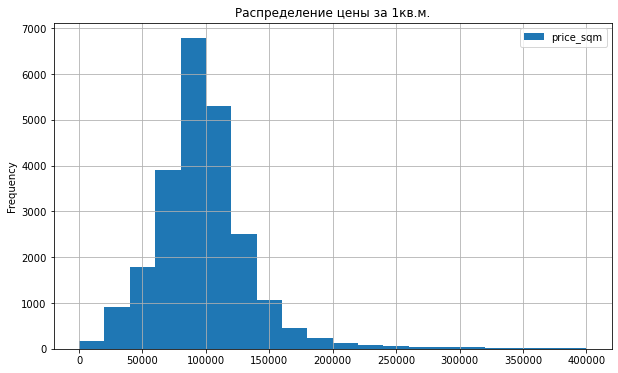

In [37]:
#строю гистограмму для 'price_sqm'
real_estate_data_onlyneeded.plot(y='price_sqm',
                                 kind='hist',
                                 bins=20,
                                 grid=True,
                                 figsize=(10,6),
                                 range=(0,400000))
plt.title('Распределение цены за 1кв.м.')
plt.show()

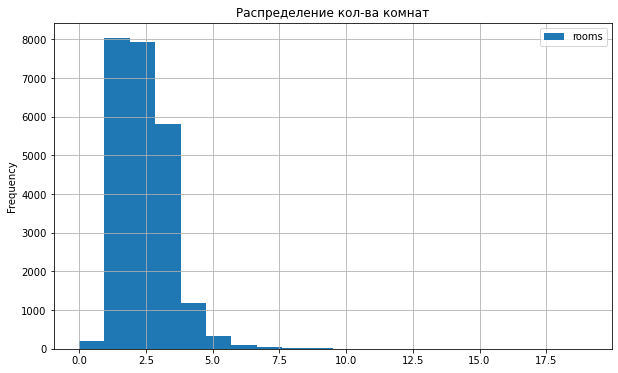

In [38]:
#строю гистограмму для 'rooms'
real_estate_data_onlyneeded.plot(y='rooms',
                                 kind='hist',
                                 bins=20,
                                 grid=True,
                                 figsize=(10,6))
plt.title('Распределение кол-ва комнат')
plt.show()

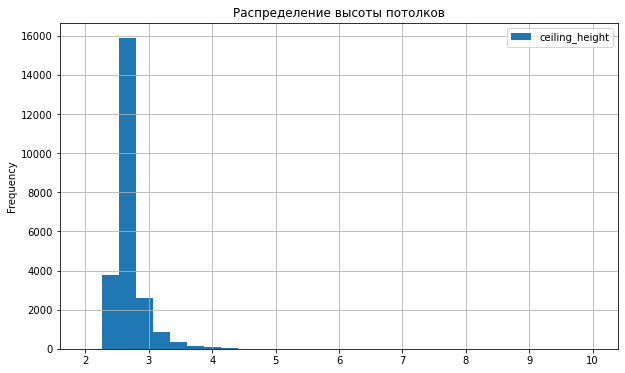

In [39]:
#строю гистограмму для 'ceiling_height'
real_estate_data_onlyneeded.plot(y='ceiling_height',
                                 kind='hist',
                                 bins=30,
                                 grid=True,
                                 figsize=(10,6),
                                 range=(2,10))
plt.title('Распределение высоты потолков')
plt.show()

"Портрет" медианной квартиры - однушка или двушка площадью 52кв.м. с потолком 2,65м c ценой за 1кв.м. около 90000 рублей.

Есть выбросы: 
- квартира с 7 комнатами (хотя это может быть дом или пент)
- площадью 900кв.м. (хотя и такие бывают, например, https://realty.rbc.ru/news/577d31429a7947a78ce97c52) 
- квартира с высотой потолка 6м
- с 19 комнатами (и такое бывает, особенно если это апарт-отель)
- с ценами за 1 кв.м. до 300000

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Отличный обзор основных параметров датасета. Молодец, что обратилась к данным РБК

### 4.2. Изучение времени продажи квартиры. Гистограмма, среднее и медиана. Сколько обычно занимает продажа

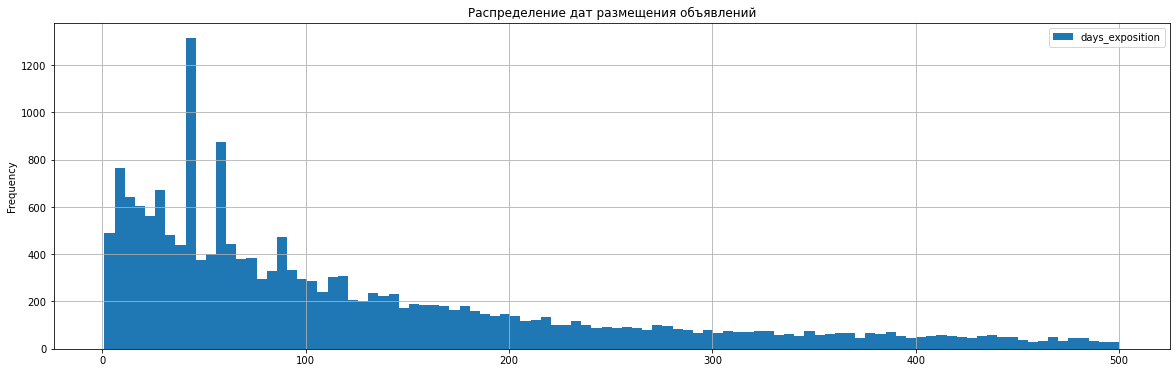

In [40]:
#строю гистограмму для 'days_exposition'
real_estate_data_onlyneeded.plot(y='days_exposition',
                                 kind='hist',
                                 bins=100,
                                 grid=True,
                                 range=(1,500),
                                 figsize=(20,6))
plt.title('Распределение дат размещения объявлений')
plt.show()

Странные всплески на 7, 30, 45, 60 и 90 днях. 
<br>Посмотрю на распределение по дням:

In [41]:
real_estate_data_onlyneeded['days_exposition'].value_counts().head(10)

0     3177
45     877
60     538
7      233
30     208
90     204
4      176
3      158
5      152
14     147
Name: days_exposition, dtype: int64

Действительно, есть всплески на 45, 60, 7, 30 и 90 днях (и логичные провалы после). И тут честно - мне подсказали, что объявления на Яндекс Недвижимости снимаются в эти сроки. Тогда становится понятно, почему всплески в этот день - алгоритм автоматически "снимает" объявление. Возможно, стоит удалить такие объявления, хотя вполне возможно, что именно на 45, 60, 7, 30 и 90 день происходит продажа. Поэтому я бы уточнила, как "закрывается" объявление и сколько среди автоматически снятых объявлений продаж.

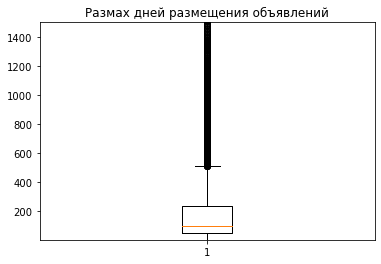

In [42]:
#строю диаграмму размаха для непустых 'days_exposition'
import matplotlib.pyplot as plt
plt.boxplot(real_estate_data_onlyneeded[real_estate_data_onlyneeded['days_exposition']!=0]['days_exposition'])
plt.ylim(1,1500)
plt.title('Размах дней размещения объявлений')
plt.show()

In [43]:
#считаю среднее значение, медиану и межквартильный размах по непустым ячейкам:
real_estate_data_onlyneeded[real_estate_data_onlyneeded['days_exposition']!=0]['days_exposition'].describe()

count    20496.000000
mean       180.942525
std        219.790042
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Медианный срок продажи квартиры - 95 дней (3 месяца). Нормальный срок продажи квартиры, судя по boxplot, примерно до 500 дней, судя по describe - от 45 до 232 дней. 
То есть продажа квартиры прошла быстро, если срок - меньше 45, и медленно, если срок - более 500 дней.  
При этом есть квартиры, которые продавались 1580 дней (больше 4 лет) и 1 день (что точно попахивает либо мошенничеством, либо "я передумал продавать").

### 4.3. Удаление редких и выбивающихся значений

#### 4.3.1. Удаление редких значений в параметре `total_area`

На гистограмме 'total_area' выше заметно, что до 20кв.м. и после 300кв.м. квартир мало (27 и 46 соответственно), поэтому можно удалить их:

In [44]:
real_estate_data_onlyneeded = real_estate_data_onlyneeded.query('20 < total_area < 300')

#### 4.3.2. Удаление редких значений в параметре `price_sqm`

На гистограмме 'price_sqm' выше заметно, цен за 1кв.м., ниже 10000р. и выше 300000р. (3 и 108 соответственно), очень мало. Поскольку в среднем цена за 1 кв.м. колеблется между 112000р. и 769000р., избавляюсь от этих строк:

In [45]:
real_estate_data_onlyneeded = real_estate_data_onlyneeded.query('10000 < price_sqm < 300000')

#### 4.3.3. Удаление редких значений в параметре `rooms`

На гистограмме 'rooms' выше заметно, что квартир с кол-вом комнат больше 10, очень мало (2 шт). Избавляюсь от этих строк:

In [46]:
real_estate_data_onlyneeded = real_estate_data_onlyneeded.query('rooms <= 10')

#### 4.3.4. Удаление редких значений в параметре `ceiling_height`


На гистограмме 'ceiling_height' выше заметно, что квартир с потолками ниже 2,4м и выше 5,5м, очень мало (5 и 1 шт. соответственно). Избавляюсь от этих строк:

In [47]:
real_estate_data_onlyneeded = real_estate_data_onlyneeded.query('2.4 < ceiling_height < 5.5')

#### 4.3.5. Удаление выбивающихся значений на 45, 60, 7, 30 и 90 день

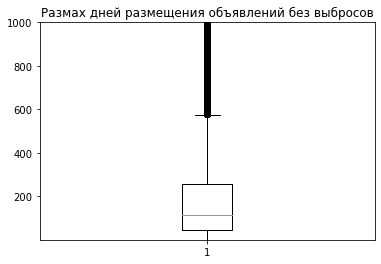

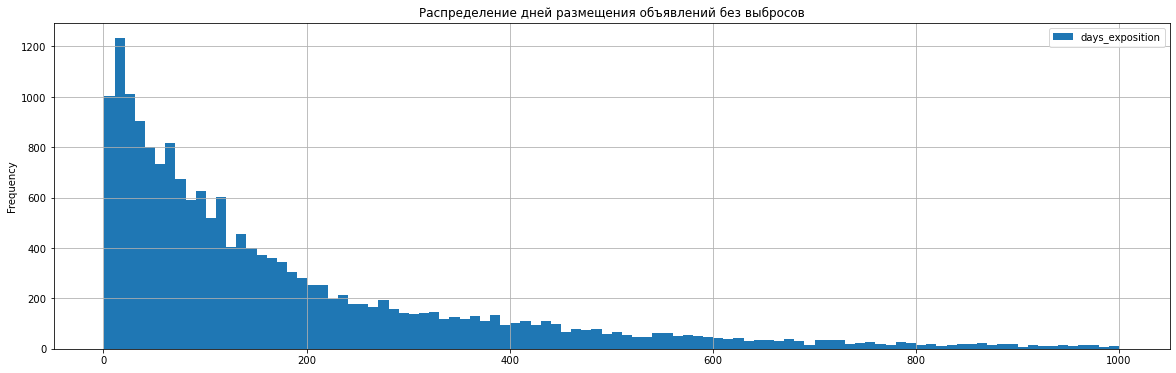

In [48]:
#удаляю всплески на 45, 60, 7, 30 и 90 день (хотя повторюсь, что не уверена в правильности такого удаления) и нулевые значения
real_estate_data_onlyneeded = real_estate_data_onlyneeded.query('days_exposition != 45 \
and days_exposition != 60 and days_exposition != 7 \
and days_exposition != 30 and days_exposition != 90 \
and days_exposition != 0')

#строю диаграмму размаха
plt.boxplot(real_estate_data_onlyneeded['days_exposition'])
plt.ylim(1,1000)
plt.title('Размах дней размещения объявлений без выбросов')
plt.show()

#строю гистограмму
real_estate_data_onlyneeded.plot(y='days_exposition',
                                 kind='hist',
                                 bins=100,
                                 grid=True,
                                 range=(1,1000),
                                 figsize=(20,6))
plt.title('Распределение дней размещения объявлений без выбросов')
plt.show()

In [49]:
#ищу среднее значение, медиану и межквартильный размах
real_estate_data_onlyneeded['days_exposition'].describe()

count    18221.000000
mean       195.179847
std        226.029528
min          1.000000
25%         44.000000
50%        113.000000
75%        257.000000
max       1580.000000
Name: days_exposition, dtype: float64

В очищенных данных медиана и среднее больше - 114 и 195 соответственно (были 95 и 180). Нормальный срок продажи квартиры, судя по boxplot, увеличился до 600 дней, судя по describe - от 44 до 259 дней.

Ограничу срок продажи так, чтобы он был более 40 дней и менее 600 дней:

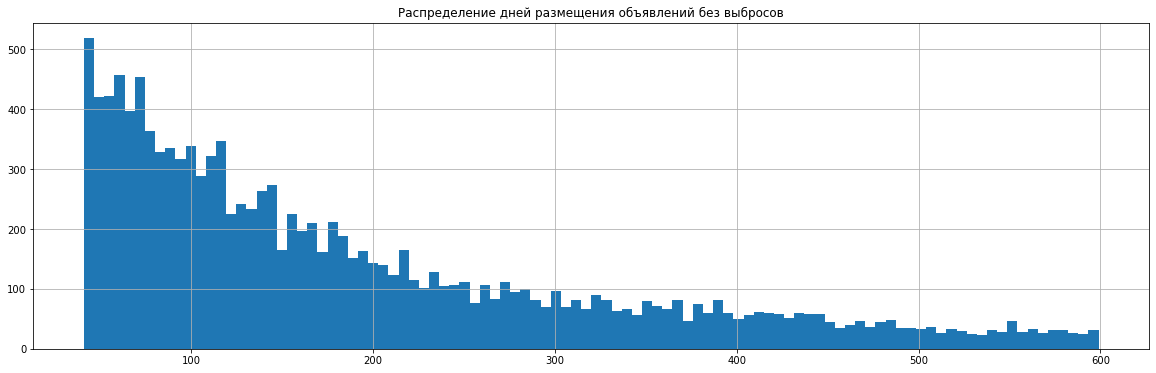

In [50]:
real_estate_data_onlyneeded.query('40 < days_exposition < 600')['days_exposition'].hist(bins=100, grid=True, figsize=(20,6))
plt.title('Распределение дней размещения объявлений без выбросов')
plt.show()

Судя по гистограмме, большая часть квартир продается в период с 40 по 80 день после размещения объявления. Похоже на правду )))

In [51]:
real_estate_data_onlyneeded.describe()  #смотрю описание таблицы, чтобы понять, насколько изменился датасет

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,cityCenters_nearest,days_exposition,price_sqm,weekday,month,year,living_area_ratio,kitchen_area_ratio
count,1.822100e+04,18221.000000,18221.000000,18221.000000,18147.000000,17154.000000,18221.000000,16806.000000,14206.000000,18221.000000,18221.000000,18221.000000,18221.000000,18221.000000,17154.000000,16806.000000
mean,5.724366e+06,57.797014,2.012787,2.690190,10.888191,32.910877,5.995006,10.300976,14338.599324,195.179847,96066.492948,2.575435,6.596564,2017.174798,0.562240,0.189191
std,4.477898e+06,28.167681,1.005092,0.204019,6.637378,18.333060,4.941849,5.166044,8543.384939,226.029528,33772.783331,1.776162,3.470144,0.980218,0.104480,0.072311
min,4.500000e+05,20.100000,0.000000,2.450000,1.000000,2.000000,1.000000,2.000000,208.000000,1.000000,10185.000000,0.000000,1.000000,2014.000000,0.038462,0.025381
25%,3.400000e+06,39.500000,1.000000,2.600000,5.000000,18.300000,2.000000,7.000000,9618.500000,44.000000,76811.000000,1.000000,3.000000,2017.000000,0.491935,0.135354
50%,4.530000e+06,50.700000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,13188.000000,113.000000,93939.000000,3.000000,7.000000,2017.000000,0.564790,0.175000
75%,6.500000e+06,67.700000,3.000000,2.700000,16.000000,41.300000,8.000000,11.800000,16384.500000,257.000000,111842.000000,4.000000,10.000000,2018.000000,0.635376,0.234043
max,7.388406e+07,297.500000,10.000000,5.300000,60.000000,225.900000,32.000000,100.700000,65968.000000,1580.000000,299000.000000,6.000000,12.000000,2019.000000,1.000000,0.787879


## Выводы:
После удаления редких и выбивающихся значений:
- кол-во строк - уменьшилось на 5455
- медианная стоимость квартир - уменьшилась на 120тыс.р. из-за отказа от очень дорогих и от того редких квартир
- медианная общая площадь - уменьшилась 1,3кв.м. опять же из-за отказа от очень больших, дорогих и редких квартир
- медианная площадь кухни - уменьшилась на 0,1кв.м.
- медианное растояние до центра - увеличилось на 89м
- медианное кол-во дней до продажи - увеличилось на 39 дней, это наиболее значительное увеличение из-за отказа от всплесков на 7, 30, 45, 60, 90 дни
- медианные кол-во комнат, высота потолка, кол-во этажей, жилая площадь остались прежними
<br>И соответственно, изменились значения в столбцах, где данные расчитаны исходя из столбцов выше

<br>В целом, измененный датасет остался узнаваемым относительно изначального, то есть фильтры не были слишком жесткие и можно на основе измененного датасета продолжать анализ. 

### 4.4. Какие факторы больше всего влияют на стоимость квартиры

#### 4.4.1. Зависимость цены от площади, числа комнат, удалённости от центра

Смотрю зависимость цены от площади, числа комнат, удалённости от центра:

In [52]:
real_estate_data_onlyneeded[['last_price', 'price_sqm', 'total_area', 'rooms', 'cityCenters_nearest']].corr()

,last_price,price_sqm,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.654954,0.803160,0.510108,-0.329343
price_sqm,0.654954,1.000000,0.180798,-0.051080,-0.398082
total_area,0.803160,0.180798,1.000000,0.789084,-0.233252
rooms,0.510108,-0.051080,0.789084,1.000000,-0.175955
cityCenters_nearest,-0.329343,-0.398082,-0.233252,-0.175955,1.000000


Теперь построю графики зависимости стоимости и цены за 1кв.м. от площади, числа комнат и удалённости от центра:

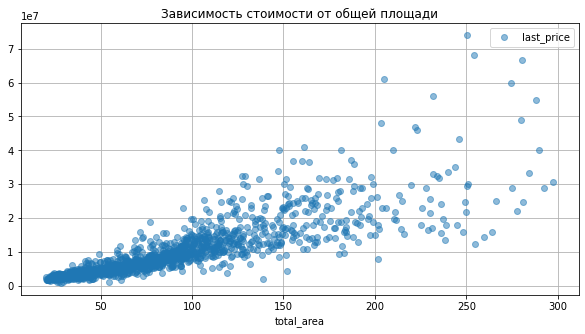

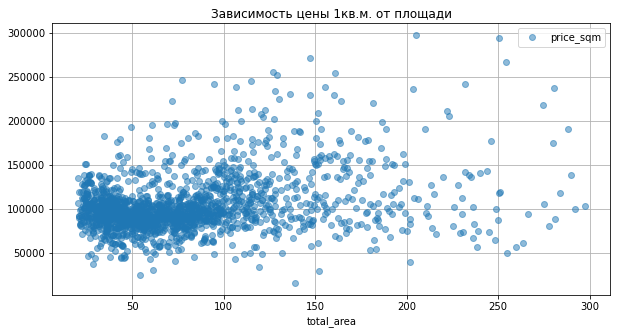

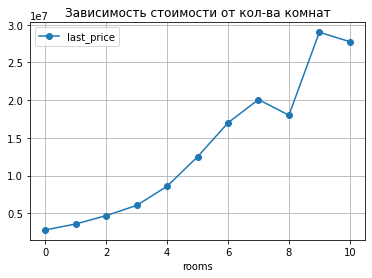

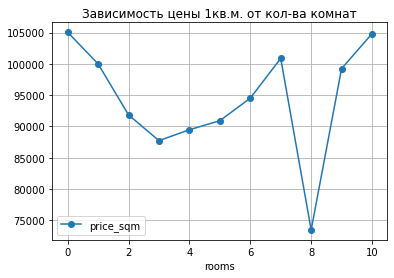

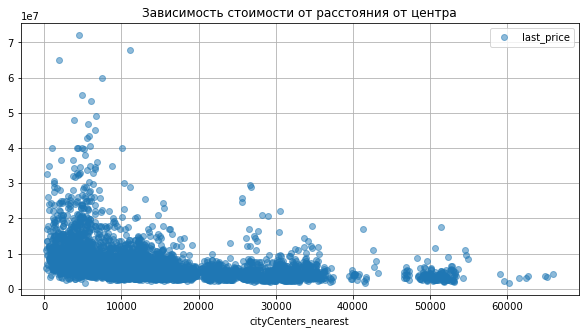

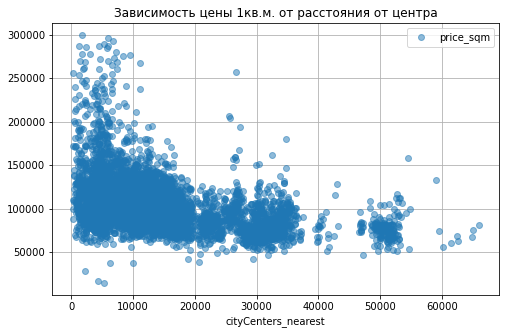

In [53]:
#строю график зависимости стоимости от площади:
total_area_last_price = real_estate_data_onlyneeded.pivot_table(index='total_area',
                                                                values='last_price',
                                                                aggfunc=['median'])
total_area_last_price.plot(y='median', style='o', figsize=(10,5), grid=True, alpha=0.5)
plt.title('Зависимость стоимости от общей площади')
plt.show()

#строю график зависимости цены 1кв.м. от площади:
total_area_price_sqm = real_estate_data_onlyneeded.pivot_table(index='total_area',
                                                               values='price_sqm',
                                                               aggfunc=['median'])
total_area_price_sqm.plot(y='median', style='o', figsize=(10,5), grid=True, alpha=0.5)
plt.title('Зависимость цены 1кв.м. от площади')
plt.show()

#строю график зависимости стоимости от кол-ва комнат:
rooms_last_price = real_estate_data_onlyneeded.pivot_table(index='rooms',
                                                           values='last_price',
                                                           aggfunc=['median'])
rooms_last_price.plot(y='median', style='-o', grid=True)
plt.title('Зависимость стоимости от кол-ва комнат')
plt.show()

#строю график зависимости цены 1кв.м. от кол-ва комнат:
rooms_price_sqm = real_estate_data_onlyneeded.pivot_table(index='rooms',
                                                          values='price_sqm',
                                                          aggfunc=['median'])
rooms_price_sqm.plot(y='median', style='-o', grid=True)
plt.title('Зависимость цены 1кв.м. от кол-ва комнат')
plt.show()

#строю график зависимости стоимости от расстояния от центра:
cityCenters_nearest_last_price = real_estate_data_onlyneeded.pivot_table(index='cityCenters_nearest',
                                                                         values='last_price',
                                                                         aggfunc=['median'])
cityCenters_nearest_last_price.plot(y='median', style='o', figsize=(10,5), grid=True, alpha=0.5)
plt.title('Зависимость стоимости от расстояния от центра')
plt.show()

#строю график зависимости цены 1кв.м. от расстояния от центра:
cityCenters_nearest_price_sqm = real_estate_data_onlyneeded.pivot_table(index='cityCenters_nearest',
                                                                        values='price_sqm',
                                                                        aggfunc=['median'])
cityCenters_nearest_price_sqm.plot(y='median', style='o', figsize=(8,5), grid=True, alpha=0.5)
plt.title('Зависимость цены 1кв.м. от расстояния от центра')
plt.show()

Разбираюсь с "провалом" цены за 8-комнатную квартиру:

In [54]:
real_estate_data_onlyneeded.query('rooms == 8').sort_values('price_sqm', ascending = False)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,price_sqm,weekday,month,year,floor_category,living_area_ratio,kitchen_area_ratio
4435,22190000,191.2,2017-12-05,8,2.90,6.0,115.8,1,5.0,Санкт-Петербург,1152.0,115,116056,1,12,2017,первый,0.605649,0.026151
12447,19900000,210.3,2016-04-18,8,3.30,5.0,144.6,2,23.6,Санкт-Петербург,5864.0,102,94626,0,4,2016,другой,0.687589,0.112221
20788,18000000,245.0,2017-04-06,8,3.54,5.0,155.0,2,NaN,Санкт-Петербург,2424.0,357,73469,3,4,2017,другой,0.632653,NaN
813,16500000,229.0,2016-02-25,8,2.65,6.0,160.0,5,25.0,Санкт-Петербург,4536.0,806,72052,3,2,2016,другой,0.698690,0.109170
18945,15800000,236.4,2015-02-19,8,2.65,6.0,176.6,6,22.6,Санкт-Петербург,1802.0,921,66835,3,2,2015,последний,0.747039,0.095601


Действительно, есть три 8-комнатные квартиры, у которых цена за 1кв.м. ниже 75000р. Возможно, это какой-то феерический дисконт, либо срочная продажа, либо мошенничество со стороны продавцов с формальным занижением цены. Можно удалить эти строки, можно оставить. Я удаляю:

In [55]:
#удаляю "руками", так как всего 3 строки:
real_estate_data_onlyneeded = real_estate_data_onlyneeded.drop(index=[20788])
real_estate_data_onlyneeded = real_estate_data_onlyneeded.drop(index=[813])
real_estate_data_onlyneeded = real_estate_data_onlyneeded.drop(index=[18945])
#индексирую по порядку:
real_estate_data_onlyneeded = real_estate_data_onlyneeded.reset_index(drop=True)

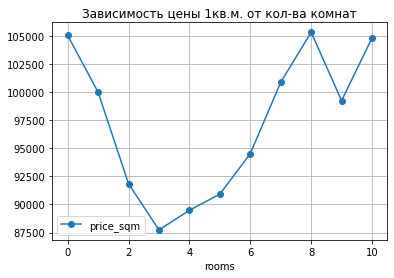

In [56]:
#снова смотрю на график цены:
rooms_price_sqm = real_estate_data_onlyneeded.pivot_table(index='rooms', values='price_sqm', aggfunc=['median'])
rooms_price_sqm.plot(y='median', style='-o', grid=True)
plt.title('Зависимость цены 1кв.м. от кол-ва комнат')
plt.show()

#### 4.4.2. Зависимость цены от первого, последнего или другого этажа

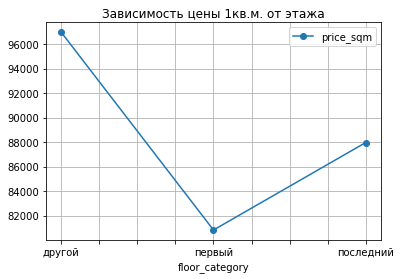

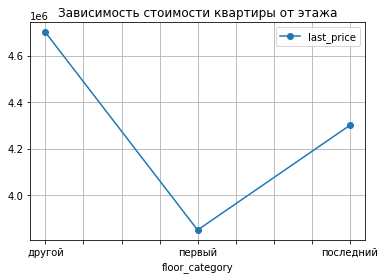

In [57]:
floor_category_price_sqm = real_estate_data_onlyneeded.pivot_table(index='floor_category', values='price_sqm', aggfunc=['median'])
floor_category_price_sqm.plot(y='median', style='-o', grid=True)
plt.title('Зависимость цены 1кв.м. от этажа')
plt.show()

floor_category_last_price = real_estate_data_onlyneeded.pivot_table(index='floor_category', values='last_price', aggfunc=['median'])
floor_category_last_price.plot(y='median', style='-o', grid=True)
plt.title('Зависимость стоимости квартиры от этажа')
plt.show()

#### 4.4.3. Зависимость цены от даты размещения: дня недели, месяца и года

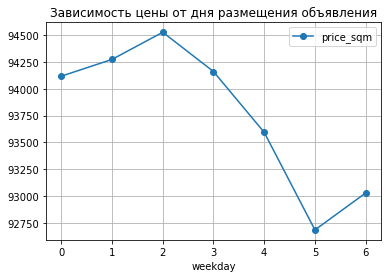

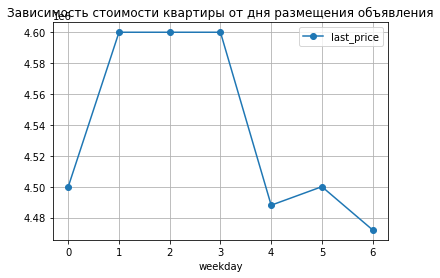

In [58]:
#строю график зависимости цены от даты размещения:
weekday_price_sqm = real_estate_data_onlyneeded.pivot_table(index='weekday', values='price_sqm', aggfunc=['median'])
weekday_price_sqm.plot(y='median', style='-o', grid=True)
plt.title('Зависимость цены от дня размещения объявления')
plt.show()

#аналогично строю график зависимости стоимости от даты размещения:
weekday_last_price = real_estate_data_onlyneeded.pivot_table(index='weekday', values='last_price', aggfunc=['median'])
weekday_last_price.plot(y='median', style='-o', grid=True)
plt.title('Зависимость стоимости квартиры от дня размещения объявления')
plt.show()

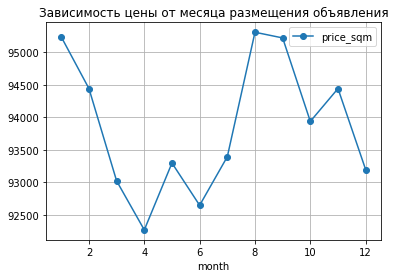

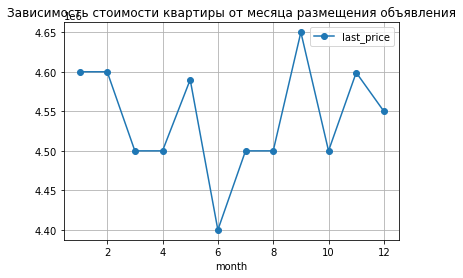

In [59]:
#строю график зависимости цены от месяца размещения:
month_price_sqm = real_estate_data_onlyneeded.pivot_table(index='month', values='price_sqm', aggfunc=['median'])
month_price_sqm.plot(y='median', style='-o', grid=True)
plt.title('Зависимость цены от месяца размещения объявления')
plt.show()

#аналогично строю график зависимости стоимости от месяца размещения:
month_last_price = real_estate_data_onlyneeded.pivot_table(index='month', values='last_price', aggfunc=['median'])
month_last_price.plot(y='median', style='-o', grid=True)
plt.title('Зависимость стоимости квартиры от месяца размещения объявления')
plt.show()

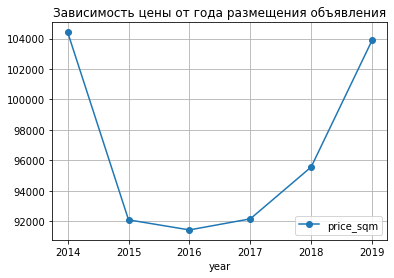

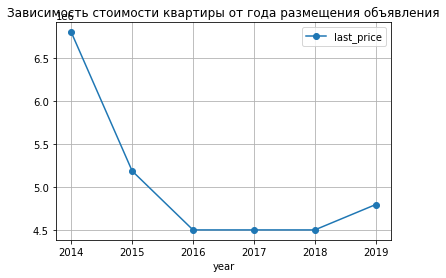

In [60]:
#строю график зависимости цены от года размещения:
year_price_sqm = real_estate_data_onlyneeded.pivot_table(index='year', values='price_sqm', aggfunc=['median'])
year_price_sqm.plot(y='median', style='-o', grid=True)
plt.title('Зависимость цены от года размещения объявления')
plt.show()

#аналогично строю график зависимости стоимости от года размещения:
year_last_price = real_estate_data_onlyneeded.pivot_table(index='year', values='last_price', aggfunc=['median'])
year_last_price.plot(y='median', style='-o', grid=True)
plt.title('Зависимость стоимости квартиры от года размещения объявления')
plt.show()

### Выводы: 
1. Банально, но самая сильная корреляция - 0,8 - между площадью квартиры и ее стоимостью. Это же можно видеть на графике, где стоимость квартир до 100кв.м. растет почти линейно. При этом цена за 1кв.м. от площади зависит слабо - 0,3 - то есть если площадь растет, то цена увеличивается не слишком быстро. 
2. Еще меньше цена за 1кв.м. зависит от кол-ва комнат - даже при росте кол-ва комнат цена растет слабо. При этом интересно, что цена за 1кв.м. наименьшая для 3-комнатных квартир. Однако стоимость квартиры напрямую зависит от числа комнат: чем их больше, тем квартира дороже. 
3. Опять-таки банально, но чем дальше от центра, тем стоимость и цена за 1кв.м. ниже. 
4. Квартиры на первом или последнем этаже продаются дешевле, чем квартиры на других этажах. При этом самые дешевые квартиры - на первых этажах.
5. Самую дорогую цену ставят в среду, самую низкую - в субботу. При этом стоимости ниже в пятницу-воскресенье, возможно, люди рассчитывают на то, что покупатели будут мониторить цены на выходных и дисконтят для быстрой продажи.
6. Дешевле всего квартиры продают летом, дороже - зимой и осенью, что совпадает с традиционными сезонными всплесками на рынке жилой недвижимости. 
7. В 2015-2018гг. была просадка по ценам и стоимостям квартир. Это можно объяснить кризисом 2014 года, когда доллар стал дороже в 3 раза.

### 4.5. 10 населённых пунктов с наибольшим числом объявлений

Выбираю 10 населённых пунктов с наибольшим числом объявлений:

In [61]:
top10 = real_estate_data_onlyneeded.pivot_table(index='locality_name', values='price_sqm', aggfunc=['count', 'mean'])
top10.columns = ['lot_quantity', 'price_sqm']
top10 = top10.sort_values('lot_quantity', ascending=False).head(10)
top10

,lot_quantity,price_sqm
locality_name,,
Санкт-Петербург,12241,108922.140021
посёлок Мурино,469,85656.558635
посёлок Шушары,358,78180.712291
Всеволожск,303,66761.155116
Пушкин,278,102680.316547
Колпино,271,75053.202952
деревня Кудрово,264,92242.348485
посёлок Парголово,261,89777.348659
Гатчина,241,67322.813278


Считаю среднюю цену квадратного метра в этих населённых пунктах и округляю до рублей:

In [62]:
top10_mean_price = round(top10['price_sqm'].mean())
top10_mean_price

82369

Выделяю населённый пункт с самой высокой стоимостью жилья:

In [63]:
top10[top10['price_sqm'] == top10['price_sqm'].max()]

,lot_quantity,price_sqm
locality_name,,
Санкт-Петербург,12241,108922.140021


Выделяю населённый пункт с самой низкой стоимостью жилья:

In [64]:
top10[top10['price_sqm'] == top10['price_sqm'].min()]

,lot_quantity,price_sqm
locality_name,,
Выборг,176,57097.931818


### Вывод: 
Населенный пункт с самым большим кол-вом объявлений и с самой дорогой ценой за 1кв.м. - СПб. Это ожидаемо.

### 4.6. Предложения квартир в СПб

Выделяю квартиры в Санкт-Петербурге в отдельную таблицу:

In [65]:
spb_real_estate_data = real_estate_data_onlyneeded.query('locality_name == "Санкт-Петербург"')
spb_real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12241 entries, 1 to 18217
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   last_price            12241 non-null  int64         
 1   total_area            12241 non-null  float64       
 2   first_day_exposition  12241 non-null  datetime64[ns]
 3   rooms                 12241 non-null  int64         
 4   ceiling_height        12241 non-null  float64       
 5   floors_total          12183 non-null  float64       
 6   living_area           11561 non-null  float64       
 7   floor                 12241 non-null  int64         
 8   kitchen_area          11347 non-null  float64       
 9   locality_name         12241 non-null  object        
 10  cityCenters_nearest   12222 non-null  float64       
 11  days_exposition       12241 non-null  int64         
 12  price_sqm             12241 non-null  int64         
 13  weekday         

Создаю столбец с расстоянием до центра в км и округляю до км:

In [66]:
spb_real_estate_data.loc[:,'cityCenters_nearest_km'] = \
(spb_real_estate_data.loc[:, 'cityCenters_nearest']/1000).round()
spb_real_estate_data.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,price_sqm,weekday,month,year,floor_category,living_area_ratio,kitchen_area_ratio,cityCenters_nearest_km
1,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,8.3,Санкт-Петербург,13933.0,558,92785,3,8,2015,другой,0.612500,0.148214,14.0
2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,41.0,Санкт-Петербург,8098.0,121,100000,1,6,2018,другой,0.320000,0.410000,8.0
6,5400000,61.0,2017-02-26,3,2.50,9.0,43.6,7,6.5,Санкт-Петербург,15008.0,289,88524,6,2,2017,другой,0.714754,0.106557,15.0
7,5050000,39.6,2017-11-16,1,2.67,12.0,20.3,3,8.5,Санкт-Петербург,13878.0,137,127525,3,11,2017,другой,0.512626,0.214646,14.0
10,4650000,39.0,2017-11-18,1,2.65,14.0,20.5,5,7.6,Санкт-Петербург,14259.0,19,119230,5,11,2017,другой,0.525641,0.194872,14.0


Считаю среднюю цену для каждого километра:

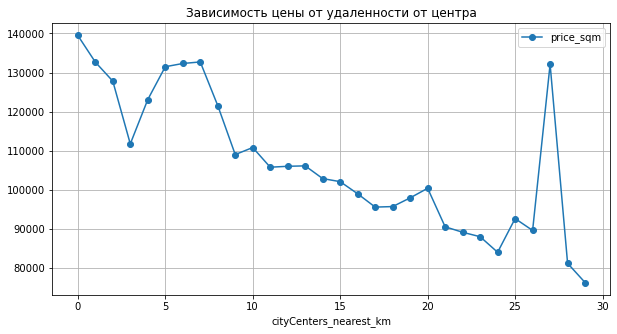

In [67]:
spb_km_price_sqm = spb_real_estate_data.pivot_table(index='cityCenters_nearest_km',
                                                    values='price_sqm',
                                                    aggfunc='mean')
spb_km_price_sqm.plot(style='-o', grid=True, figsize=(10,5))
plt.title('Зависимость цены от удаленности от центра')
plt.show()

### Вывод: 
Я бы считала центром круг с радиусом 7км, так как в нем самая высокая цена за 1кв.м. Единственное, что меня смущает - падение цены на 3км, но это возможно из-за того, что с востока на запад СПб у́же, чем с севера на юг, таким образом, после 3 км на запад в СПб уже не центр - и цена за 1кв.м. снижается.

### 4.7. Сегмент квартир в центре СПб

Выделяю сегмент квартир в центре СПб в отдельную таблицу:

In [68]:
spb_center = spb_real_estate_data.query('cityCenters_nearest_km <= 7')
spb_center.head(5)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,price_sqm,weekday,month,year,floor_category,living_area_ratio,kitchen_area_ratio,cityCenters_nearest_km
18,6500000,97.2,2015-10-31,2,2.65,3.0,46.5,1,19.6,Санкт-Петербург,2336.0,265,66872,5,10,2015,первый,0.478395,0.201646,2.0
29,15500000,149.0,2017-06-26,5,2.65,5.0,104.0,4,17.0,Санкт-Петербург,3502.0,644,104026,0,6,2017,другой,0.697987,0.114094,4.0
41,45000000,161.0,2017-10-17,3,3.20,8.0,38.0,4,50.0,Санкт-Петербург,6589.0,541,279503,1,10,2017,другой,0.236025,0.310559,7.0
50,7990000,74.0,2017-08-24,2,2.65,4.0,43.0,4,20.0,Санкт-Петербург,4288.0,609,107972,3,8,2017,последний,0.581081,0.270270,4.0
52,20000000,118.0,2018-09-11,3,3.00,9.0,68.0,7,16.0,Санкт-Петербург,4800.0,37,169491,1,9,2018,другой,0.576271,0.135593,5.0


In [69]:
spb_center.describe()

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,cityCenters_nearest,days_exposition,price_sqm,weekday,month,year,living_area_ratio,kitchen_area_ratio,cityCenters_nearest_km
count,2.565000e+03,2565.000000,2565.000000,2565.000000,2560.000000,2406.000000,2565.000000,2374.000000,2565.000000,2565.000000,2565.000000,2565.000000,2565.000000,2565.000000,2406.000000,2374.000000,2565.000000
mean,1.083868e+07,84.483587,2.709552,2.916207,7.140234,49.507764,4.169201,13.681950,4539.530994,262.883821,127947.959844,2.501754,6.610136,2016.946979,0.579203,0.176657,4.509552
std,7.584649e+06,42.818844,1.271403,0.349421,3.936118,28.893064,2.981127,7.752065,1627.172375,277.089038,43413.657703,1.702669,3.421515,1.052963,0.115644,0.082720,1.652660
min,1.600000e+06,20.300000,0.000000,2.450000,2.000000,2.000000,1.000000,2.000000,208.000000,3.000000,15345.000000,0.000000,1.000000,2014.000000,0.038462,0.025381,0.000000
25%,6.350000e+06,54.500000,2.000000,2.650000,5.000000,30.000000,2.000000,9.000000,3567.000000,66.000000,97222.000000,1.000000,3.000000,2016.000000,0.511315,0.120000,4.000000
50%,8.500000e+06,75.000000,3.000000,2.750000,6.000000,44.000000,3.000000,11.600000,4728.000000,162.000000,118397.000000,3.000000,7.000000,2017.000000,0.594445,0.155160,5.000000
75%,1.250000e+07,101.300000,3.000000,3.100000,9.000000,61.387500,5.000000,16.000000,5744.000000,367.000000,147685.000000,4.000000,10.000000,2018.000000,0.661731,0.209952,6.000000
max,7.388406e+07,297.500000,10.000000,5.300000,25.000000,225.900000,25.000000,100.700000,7489.000000,1512.000000,299000.000000,6.000000,12.000000,2019.000000,0.983447,0.625000,7.000000


**Промежуточный вывод:**
<br>У выделенной таблица по центру СПб следующие отличия от основной таблицы по Спб и Ленобласти:
1. Минимальная и медианная стоимость квартир в центре СПб гораздо выше.
2. Медианная общая площадь больше на 25кв.м. И соответственно, больше медианные жилая площадь и площадь кухни. 
3. Потолки выше на 5см.
4. Медианная этажность зданий - 6 этажей, что вполне соответствует исторической застройке.
5. До Дворцовой объективно ближе, так как это центр.
6. И ожидаемо больше медианная экспозиция объявлений -  квартиры дороже, спрос на них уже.

#### 4.7.1. Зависимость цены в центре СПб от площади, числа комнат, высоты потолка

In [70]:
#cмотрю зависимость стоимости, цены в центре СПб от площади, числа комнат, высоты потолка:
spb_center[['last_price', 'price_sqm', 'total_area', 'rooms', 'ceiling_height']].corr()

,last_price,price_sqm,total_area,rooms,ceiling_height
last_price,1.000000,0.589429,0.766753,0.466132,0.216837
price_sqm,0.589429,1.000000,0.015680,-0.213695,0.023755
total_area,0.766753,0.015680,1.000000,0.783696,0.270487
rooms,0.466132,-0.213695,0.783696,1.000000,0.237022
ceiling_height,0.216837,0.023755,0.270487,0.237022,1.000000


Теперь построю графики зависимости стоимости и цены за 1кв.м. от площади, числа комнат и потолка:

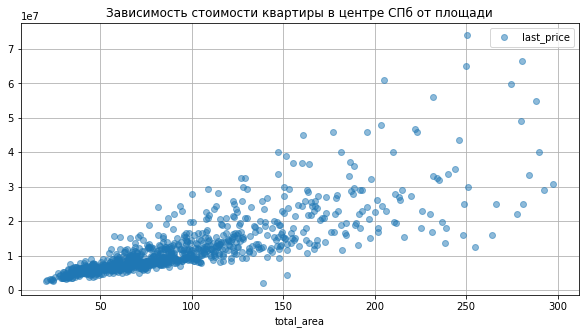

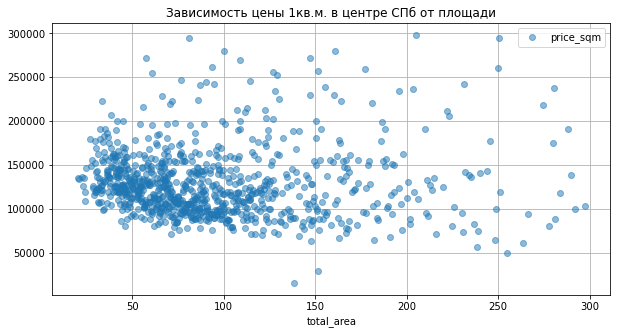

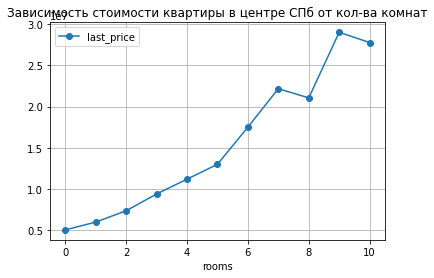

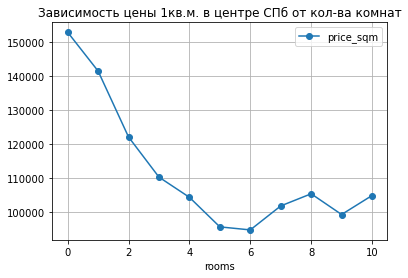

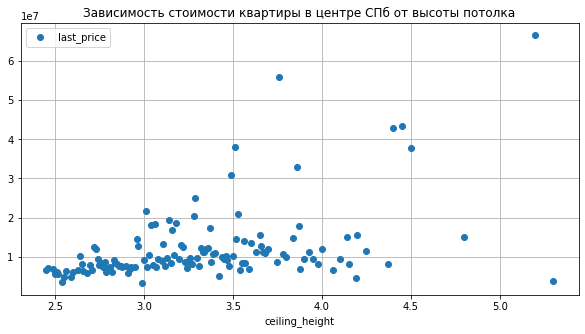

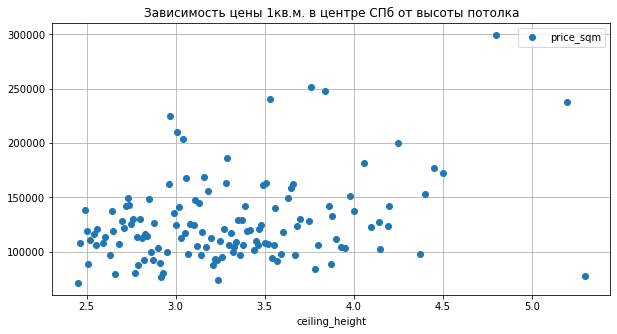

In [71]:
#строю график зависимости стоимости от площади:
spb_center_total_area_last_price = spb_center.pivot_table(index='total_area',
                                                          values='last_price',
                                                          aggfunc=['median'])
spb_center_total_area_last_price.plot(y='median', style='o', figsize=(10,5), grid=True, alpha=0.5)
plt.title('Зависимость стоимости квартиры в центре СПб от площади')
plt.show()

#строю график зависимости цены 1кв.м. от площади:
spb_center_total_area_price_sqm = spb_center.pivot_table(index='total_area',
                                                         values='price_sqm',
                                                         aggfunc=['median'])
spb_center_total_area_price_sqm.plot(y='median', style='o', figsize=(10,5), grid=True, alpha=0.5)
plt.title('Зависимость цены 1кв.м. в центре СПб от площади')
plt.show()

#строю график зависимости стоимости от кол-ва комнат:
spb_center_rooms_last_price = spb_center.pivot_table(index='rooms',
                                                     values='last_price',
                                                     aggfunc=['median'])
spb_center_rooms_last_price.plot(y='median', style='-o', grid=True)
plt.title('Зависимость стоимости квартиры в центре СПб от кол-ва комнат')
plt.show()

#строю график зависимости цены 1кв.м. от кол-ва комнат:
spb_center_rooms_price_sqm = spb_center.pivot_table(index='rooms', values='price_sqm', aggfunc=['median'])
spb_center_rooms_price_sqm.plot(y='median', style='-o', grid=True)
plt.title('Зависимость цены 1кв.м. в центре СПб от кол-ва комнат')
plt.show()

#строю график зависимости стоимости от высоты потолка:
spb_center_ceiling_height_last_price = spb_center.pivot_table(index='ceiling_height',
                                                              values='last_price',
                                                              aggfunc=['median'])
spb_center_ceiling_height_last_price.plot(y='median', style='o', grid=True, figsize=(10,5))
plt.title('Зависимость стоимости квартиры в центре СПб от высоты потолка')
plt.show()

#строю график зависимости цены 1кв.м. от высоты потолка:
spb_center_ceiling_height_price_sqm = spb_center.pivot_table(index='ceiling_height',
                                                             values='price_sqm',
                                                             aggfunc=['median'])
spb_center_ceiling_height_price_sqm.plot(y='median', style='o', grid=True, figsize=(10,5))
plt.title('Зависимость цены 1кв.м. в центре СПб от высоты потолка')
plt.show()

#### 4.7.2. Зависимость цены в центре СПб от первого, последнего или другого этажа

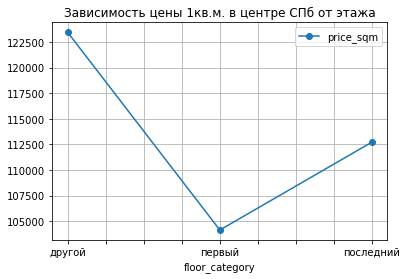

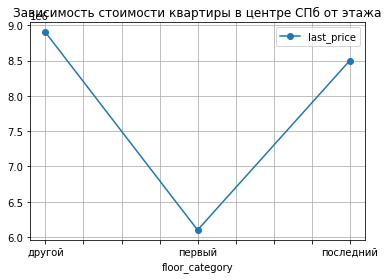

In [72]:
spb_center_floor_category_price_sqm = spb_center.pivot_table(index='floor_category',
                                                             values='price_sqm',
                                                             aggfunc=['median'])
spb_center_floor_category_price_sqm.plot(y='median', style='-o', grid=True)
plt.title('Зависимость цены 1кв.м. в центре СПб от этажа')
plt.show()

spb_center_floor_category_last_price = spb_center.pivot_table(index='floor_category',
                                                              values='last_price',
                                                              aggfunc=['median'])
spb_center_floor_category_last_price.plot(y='median', style='-o', grid=True)
plt.title('Зависимость стоимости квартиры в центре СПб от этажа')
plt.show()

#### 4.7.3. Зависимость цены в центре СПб от даты размещения: дня недели, месяца и года

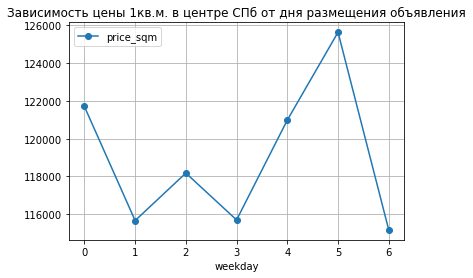

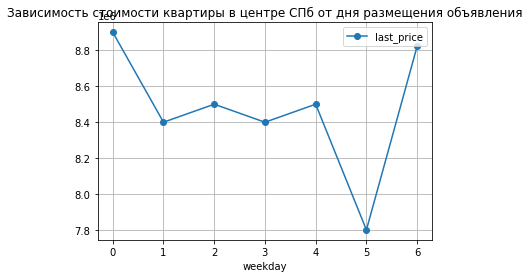

In [73]:
#строю график зависимости цены от даты размещения:
spb_center_weekday_price_sqm = spb_center.pivot_table(index='weekday',
                                                      values='price_sqm',
                                                      aggfunc=['median'])
spb_center_weekday_price_sqm.plot(y='median', style='-o', grid=True)
plt.title('Зависимость цены 1кв.м. в центре СПб от дня размещения объявления')
plt.show()

#аналогично строю график зависимости стоимости от даты размещения:
spb_center_weekday_last_price = spb_center.pivot_table(index='weekday',
                                                       values='last_price',
                                                       aggfunc=['median'])
spb_center_weekday_last_price.plot(y='median', style='-o', grid=True)
plt.title('Зависимость стоимости квартиры в центре СПб от дня размещения объявления')
plt.show()

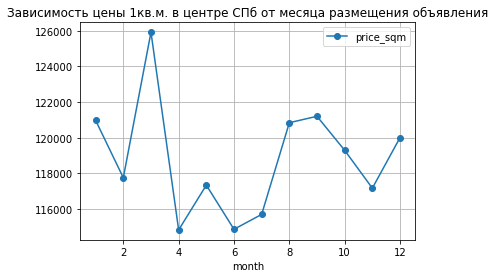

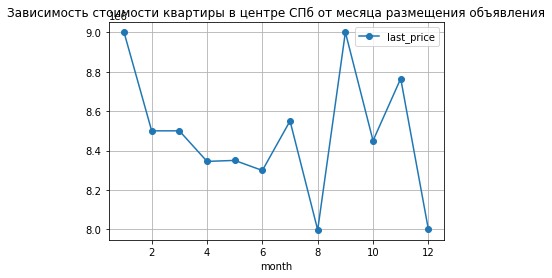

In [74]:
#строю график зависимости цены от месяца размещения:
spb_center_month_price_sqm = spb_center.pivot_table(index='month',
                                                    values='price_sqm',
                                                    aggfunc=['median'])
spb_center_month_price_sqm.plot(y='median', style='-o', grid=True)
plt.title('Зависимость цены 1кв.м. в центре СПб от месяца размещения объявления')
plt.show()

#аналогично строю график зависимости стоимости от месяца размещения:
spb_center_month_last_price = spb_center.pivot_table(index='month',
                                                     values='last_price',
                                                     aggfunc=['median'])
spb_center_month_last_price.plot(y='median', style='-o', grid=True)
plt.title('Зависимость стоимости квартиры в центре СПб от месяца размещения объявления')
plt.show()

In [75]:
#строю график зависимости цены от года размещения:
spb_center_year_price_sqm = spb_center.pivot_table(index='year',
                                                   values='price_sqm'
                                                   aggfunc=['median'])
spb_center_year_price_sqm.plot(y='median', style='-o', grid=True)
plt.title('Зависимость цены 1кв.м. в центре СПб от года размещения объявления')
plt.show()

#аналогично строю график зависимости стоимости от года размещения:
spb_center_year_last_price = spb_center.pivot_table(index='year',
                                                    values='last_price',
                                                    aggfunc=['median'])
spb_center_year_last_price.plot(y='median', style='-o', grid=True)
plt.title('Зависимость стоимости квартиры в центре СПб от года размещения объявления')
plt.show()

SyntaxError: invalid syntax (4150764834.py, line 4)

### Выводы: 
1. Точно так же, как и в таблице по СПб и Ленобласти, в центре СПб чем больше площадь, тем выше стоимость квартиры. Это можно видеть на графике, где стоимость квартир до 100кв.м. растет почти линейно. При этом цена за 1кв.м. от площади зависит больше, чем в таблице по СПб и Ленобласти - 0,6 вместо 0,3, что можно объяснить тем, что большую квартиру в центре СПб найти гораздо труднее, следовательно, стоит она гораздо дороже.   
2. Стоимость и цена за 1кв.м. зависят от кол-ва комнат больше, чем в таблице по СПб и Ленобласти. Это опять-таки можно объяснить тем, что многокомнатные квартиры в центре СПб - редкость. 
3. Как и в таблице по СПб и Ленобласти, цена за 1кв.м. квартиры на первом или последнем этаже - ниже, чем в квартирах на других этажах. Однако, в отличие от таблицы по СПб и Ленобласти, стоимость квартир на последних этажах поти такая же, как на других. Объясняю это лучшими видовыми характеристиками последних этажей и возможностью присоединить чердачные помещения и выход на крыши.
4. Интересно, что в отличие от таблицы по СПб и Ленобласти, самая дорогая цена выставляется в субботу. 
5. Дешевле всего квартиры в центре СПб, как и везде, продают летом. 
7. В 2015 была просадка по цене 1кв.м., но затем ситуация, в отличие от СПб и области, начала выправляться. Однако общая цена, в отличие от таблицы по СПб и области, неуклонно падает с 2015 года. Возможно, покупателей не устраивают цены на квартиры в центре СПб.

## 5. Общий вывод

<br>Опуская выводы по обработке данных, замене пропусков, типов данных, добавлению параметров и удалению редких и выпадающих значений, прихожу к следующим выводам:
1. На стоимость квартиры по убыванию влияет площадь квартиры, количество комнат и близость к центру. При этом в центре СПб последние этажи стоят почти столько же, сколько другие, в отличие от общей исследованной массы квартир.
2. День, месяц размещения незначительно влияют на стоимость квартиры, однако в 2015 был спад стоимости квартир. 
3. Условным центром СПб можно считать овал с длиной с севера на юг 14 км, с запада на восток - 6 км. В этих пределах наиболее дорогие квартиры. Аутсайдер спроса и цен - Выборг.
4. Я не сегментировала/типировала квартиры на апартаменты, студии, квартиры, хотя можно было бы это сделать, чтобы выявить поведение цены и стоимости в разных сегментах. Могу предположить, что они ведут себя по-разному, так как об этом свидетельствует разное поведение параметров год к году в центре СПб и в общей исследованной массе квартир по СПб и Ленобласти.